<a href="https://colab.research.google.com/github/Andrian0s/ML4NLP1-2024-Tutorial-Notebooks/blob/main/exercises/ex1/ex1_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Teammates:
Yuxuan Wang 24-741-399
Leyi Hu 24-756-108
Jinglei Huang 23-746-217

# ML4NLP1

## Starting Point for Exercise 1, part I

This notebook is supposed to serve as a starting point and/or inspiration when starting exercise 1, part I.

One of the goals of this exercise is to get you acquainted with sklearn and related libraries like pandas and numpy. You will probably need to consult the documentation of those libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- NumPy: [Documentation](https://numpy.org/doc/)
- SHAP: [Documentation](https://shap.readthedocs.io/en/latest/index.html)

## Task Description

Follow the instructions in this notebook to:

1. Explore the data and create training/test splits for your experiments

2. Build a LogisticRegression classifier and design some relevant features to apply it to your data

3. Conduct hyperparameter tuning to find the optimal hyperparameters for your model

4. Explore your model's predictions and conduct an error analysis to see where the model fails

5. Conduct an interpretability analysis, investigating the model's most important features.

6. Conduct an ablation study using a subset of languages


Throughout the notebook, there are questions that you should address in your report. These are marked with 🗒❓.

☝ Note, these questions are intended to provide you with an opportunity to reflect on what it is that you are doing and the kind of challenges you might face along the way.




In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

### Loading the datasets

In [ ]:
# Download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:00<00:00, 136MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:01<00:00, 37.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 7.53MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 6.11MB/s]


In [ ]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [ ]:
# Combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# Write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# Comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})
# Inspect the first 5 items in the train split
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


In [ ]:
# Get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'

### 1.1 Exploring the training data

📝❓Take a look at a couple of texts from different languages and answer the following questions:

1. Do you notice anything that might be challenging for the classification?
   
   Some languages are very similar, for example, Simplified and Traditional Chinese share many common characters, making them hard to distinguish.
2. How is the data distributed? (i.e., how many instances per label are there in the training and test set? Is it a balanced dataset?)
   
   Both the training and test sets are balanced, containing 500 samples per language.
3. Do you think the train/test split is appropriate (i.e., is the test data representative of the training data)? If not, please rearrange the data in a more appropriate way.
   
   Although the split is 50% train and 50% test instead of the usual 80/20 ratio, both subsets cover all languages evenly. Since the dataset is large and representative, the split is acceptable for this experiment.

In [ ]:
# TODO: Inspect the training data

print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total unique languages: {len(train_df['label'].unique())}")
print(f"Languages: {train_df['label'].unique()}")

# Here we can see there are 235 classes, however the train size and test size are equal
# Usuallt the train size should have the most data (80%), but here since we have enough data, so it should be fine

Total training samples: 117500
Total test samples: 117500
Total unique languages: 235
Languages: ['est' 'swe' 'mai' 'oci' 'tha' 'orm' 'lim' 'guj' 'pnb' 'zea' 'krc' 'hat'
 'pcd' 'tam' 'vie' 'pan' 'szl' 'ckb' 'fur' 'wuu' 'arz' 'ton' 'eus'
 'map-bms' 'glk' 'nld' 'bod' 'jpn' 'arg' 'srd' 'ext' 'sin' 'kur' 'che'
 'tuk' 'pag' 'tur' 'als' 'koi' 'lat' 'urd' 'tat' 'bxr' 'ind' 'kir'
 'zh-yue' 'dan' 'por' 'fra' 'ori' 'nob' 'jbo' 'kok' 'amh' 'khm' 'hbs'
 'slv' 'bos' 'tet' 'zho' 'kor' 'sah' 'rup' 'ast' 'wol' 'bul' 'gla' 'msa'
 'crh' 'lug' 'sun' 'bre' 'mon' 'nep' 'ibo' 'cdo' 'asm' 'grn' 'hin' 'mar'
 'lin' 'ile' 'lmo' 'mya' 'ilo' 'csb' 'tyv' 'gle' 'nan' 'jam' 'scn'
 'be-tarask' 'diq' 'cor' 'fao' 'mlg' 'yid' 'sme' 'spa' 'kbd' 'udm' 'isl'
 'ksh' 'san' 'aze' 'nap' 'dsb' 'pam' 'cym' 'srp' 'stq' 'tel' 'swa' 'vls'
 'mzn' 'bel' 'lad' 'ina' 'ava' 'lao' 'min' 'ita' 'nds-nl' 'oss' 'kab'
 'pus' 'fin' 'snd' 'kaa' 'fas' 'cbk' 'cat' 'nci' 'mhr' 'roa-tara' 'frp'
 'ron' 'new' 'bar' 'ltg' 'vro' 'lav' 'ces' 'yor' 'nso'

In [ ]:
# Display examples of Venetian language texts
vec_examples = train_df[train_df["label"] == "zho"]["text"]
print(f"\nFirst 5 examples:")
for i, text in enumerate(vec_examples.head(5), 1):
    print(f"{i}. {text}")


First 5 examples:
1. 胡赛尼本人和小说的主人公阿米尔一样，都是出生在阿富汗首都喀布尔，少年时代便离开了这个国家。胡赛尼直到2003年小说出版之后才首次回到已经离开27年的祖国。他在苏联入侵时离开了阿富汗，而他的很多童年好友在阿富汗生活艰难，还有一些表亲离开人世，其中一位在童年时代和他一起放风筝的表兄弟就是在逃离阿富汗时死在了油罐车中（这一情节在《追风筝的人》中也有描写），而这位表兄弟的父亲也被人枪杀；因此胡赛尼总是怀有幸存者所特有的一种内疚心态，这种情感在小说中也有体现。很多人因此认为这部小说有些自传色彩。胡赛尼则表示小说中确实有一部分内容是根据自己的经历创作的，他和故事主人公也有很多相似点，但是一些内容被他刻意地模糊处理了。尽管和主人公的经历有诸多的相似点，胡赛尼仍然坚称小说情节确实是虚构的。之后胡赛尼在创作他的第二部小说《灿烂千阳》时把主人公设定为女性，称“这样应该就能一劳永逸地解决人们关于‘自传’的问题了”。
2. 2017年1月7日，參與了「SNH48第三屆年度金曲大賞BEST 50」。2月15日，出演由优酷视频，盟将威影视，嗨乐娱乐及世纪影游联合出品的《热血长安》，饰演上官紫苏一角。5月4日，鞠婧祎代表SNH48获得中央“五四优秀青年”称号。6月8日，發行第2張個人EP《等不到你》。6月18日，于万代南梦宫文化中心举办生日Fan Meeting。7月29日，于SNH48第四届总选举，获得第1名，最终获得277,781.3票，成为第四届总选举选拔组Center，又成为SNH48首位於总选举連霸的成员。12月15日，絲芭傳媒正式宣布鞠婧禕晉升SNH48 Group明星殿堂，成立个人工作室单飞发展，日後將以個人名義進行活動，鞠婧禕成为SNH48 Group成立以为第一个晋升明星殿堂的成员。2017年10月28日，由知名电影网站TC Chandler评选的年度“世界最美面孔100人”公布2017年票选结果中，荣获第8名。
3. 在他们出发之前，罗伯特·菲茨罗伊送给了达尔文一卷查尔斯·赖尔所著《地质学原理》（在南美他得到第二卷）。该书将地形地貌解释为漫长历史时间渐进演变的的结果。当他旅程的第一站抵达圣地亚哥佛得角的时候，达尔文注意到该地火山岩峭壁的高处有一条白色的沉积层内有许多裸露的珊瑚与贝壳碎片。这很好地解释了赖尔的理论，并给予了达尔文思考岛

In [ ]:
print("\n=== DATA DISTRIBUTION ===")
# Check distribution of languages in train and test sets
train_dist = train_df['label'].value_counts()
test_dist = test_df['label'].value_counts()

print(f"Mean samples per language: {train_dist.mean():.1f}")
print(f"Std samples per language: {train_dist.std():.1f}")

# Check if all labels have the same count
print(f"\nChecking if dataset is balanced:")
print(f"All training languages have exactly 500 samples: {(train_dist == 500).all()}")
print(f"All test languages have exactly 500 samples: {(test_dist == 500).all()}")

# As we can see the labels are balanced, 500 for each sample, which is nice for classification


=== DATA DISTRIBUTION ===
Mean samples per language: 500.0
Std samples per language: 0.0

Checking if dataset is balanced:
All training languages have exactly 500 samples: True
All test languages have exactly 500 samples: True


In [ ]:
# Check text length distribution
train_df['text_length'] = train_df['text'].str.len()
test_df['text_length'] = test_df['text'].str.len()

print(f"\n=== TEXT LENGTH STATISTICS ===")
print(f"Training text length - Mean: {train_df['text_length'].mean():.1f}, Std: {train_df['text_length'].std():.1f}")
print(f"Test text length - Mean: {test_df['text_length'].mean():.1f}, Std: {test_df['text_length'].std():.1f}")


# Here we can see the text length vary a lot, which can be some problem for the classification


=== TEXT LENGTH STATISTICS ===
Training text length - Mean: 369.0, Std: 457.2
Test text length - Mean: 372.5, Std: 812.9


### 1.2 Data preparation

Get a subset of the train/test data that includes 20 languages.
Include English, German, Dutch, Danish, Swedish, Norwegian, and Japanese, plus 13 additional languages of your choice based on the items in the list of labels.

In [ ]:
# # TODO: Create your train/test subsets of languages
required_languages = ['eng', 'deu', 'nld', 'dan', 'swe', 'nob', 'jpn', 'zh-yue', 'zho']

all_languages = train_df['label'].value_counts()
additional_languages = []

for lang in all_languages.index:
    if lang not in required_languages and len(additional_languages) < 11:
        additional_languages.append(lang)

selected_languages = required_languages + additional_languages
print(f"Selected 20 languages: {selected_languages}")

# Create subsets
train_subset = train_df[train_df['label'].isin(selected_languages)].copy()
test_subset = test_df[test_df['label'].isin(selected_languages)].copy()

print(f"Original training size: {len(train_df)}")
print(f"Subset training size: {len(train_subset)}")
print(f"Original test size: {len(test_df)}")
print(f"Subset test size: {len(test_subset)}")

# Check if all labels in subset have the same count
print(f"\nChecking if dataset is balanced:")
print(f"All training languages have exactly 500 samples: {(train_subset['label'].value_counts() == 500).all()}")
print(f"All test languages have exactly 500 samples: {(test_subset['label'].value_counts() == 500).all()}")

# Update our working datasets
x_train_subset = train_subset['text'].tolist()
y_train_subset = train_subset['label'].tolist()
x_test_subset = test_subset['text'].tolist()
y_test_subset = test_subset['label'].tolist()

print(f"Training subset: {len(x_train_subset)} samples")
print(f"Test subset: {len(x_test_subset)} samples")

Selected 20 languages: ['eng', 'deu', 'nld', 'dan', 'swe', 'nob', 'jpn', 'zh-yue', 'zho', 'est', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat']
Original training size: 117500
Subset training size: 10000
Original test size: 117500
Subset test size: 10000

Checking if dataset is balanced:
All training languages have exactly 500 samples: True
All test languages have exactly 500 samples: True
Training subset: 10000 samples
Test subset: 10000 samples


In [ ]:
# TODO: With the following code, we wanted to ENCODE the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder

# Create and fit the label encoder on training labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train_subset)

# Transform both training and test labels
y_train_encoded = label_encoder.transform(y_train_subset)
y_test_encoded = label_encoder.transform(y_test_subset)

print(f"Original labels: {y_train_subset[:5]}")
print(f"Encoded labels: {y_train_encoded[:5]}")
print(f"\nUnique encoded labels: {sorted(set(y_train_encoded))}")
print(f"Number of classes: {len(label_encoder.classes_)}")

Original labels: ['est', 'swe', 'mai', 'oci', 'tha']
Encoded labels: [ 3 15  9 12 16]

Unique encoded labels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19)]
Number of classes: 20


### 2.1 Build a LogisticRegression classifier

To start with, we're going to build a very simple LogisticRegression classifier.
Use a `Pipeline` to chain togther a `CountVectorizer` and a `LogisticRegression` estimator. Then perform a 5-fold cross validation and report the scores of this model as a baseline.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

baseline_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

In [ ]:
# Run 5-fold cross validation to estimate baseline performance
cv_scores = cross_val_score(baseline_pipeline, x_train_subset, y_train_encoded,
                           cv=5, scoring='accuracy', n_jobs=-1)
baseline_accuracy = cv_scores.mean()

print(f"5-fold CV scores: {cv_scores}")
print(f"Mean CV accuracy: {baseline_accuracy:.4f} (+/- {cv_scores.std() * 2:.4f})")

5-fold CV scores: [0.895  0.8975 0.896  0.894  0.9015]
Mean CV accuracy: 0.8968 (+/- 0.0052)



### 2.2 Feature Engineering

So far, we've only considered the basic `CountVectorizer` at the word level to encode our input texts for our model.

Your task is to apply some text preprocessing and engineer some more informative features.

To do this, think about what other features might be relevant for determining the language of an input text.

Define a custom set of feature extractors and implement the necessary preprocessing steps to extract these features from strings.

Then initialise a processing pipeline that converts your input data into features that the model can take as input.

☝ Note, this step can be as involved as your heart desires, there is only one minimal requirement: you must use something more than the base `CountVectorizer`. We recommend that you take a look at the [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) and [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html#transformermixin) classes from `sk-learn`, as these can be helpful for defining custom transformers.


In [ ]:
# TODO: Data cleaning/Feature engineering steps
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
import string
import re

class LanguageFeatures(BaseEstimator, TransformerMixin):
    """Custom transformer to extract language-specific features"""

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Extract various linguistic features from texts"""
        features = []

        for text in X:
            text_features = {}

            # Basic text statistics
            text_features['text_length'] = len(text)
            text_features['word_count'] = len(text.split())
            text_features['avg_word_length'] = np.mean([len(word) for word in text.split()]) if text.split() else 0

            # Character-level features
            text_features['digit_ratio'] = sum(c.isdigit() for c in text) / len(text) if text else 0
            text_features['upper_ratio'] = sum(c.isupper() for c in text) / len(text) if text else 0
            text_features['punct_ratio'] = sum(c in string.punctuation for c in text) / len(text) if text else 0

            # Language-specific character patterns
            text_features['has_accents'] = int(bool(re.search(r'[àáâãäåæçèéêëìíîïðñòóôõöøùúûüýþÿ]', text.lower())))
            text_features['has_umlauts'] = int(bool(re.search(r'[äöüß]', text.lower())))
            text_features['has_nordic'] = int(bool(re.search(r'[æøå]', text.lower())))
            text_features['has_cyrillic'] = int(bool(re.search(r'[а-я]', text.lower())))
            text_features['has_arabic'] = int(bool(re.search(r'[ء-ي]', text)))
            text_features['has_cjk'] = int(bool(re.search(r'[一-龯ひらがなカタカナ]', text)))

            # Vowel/consonant ratios (for Latin scripts)
            latin_chars = re.sub(r'[^a-zA-Z]', '', text.lower())
            if latin_chars:
                vowels = sum(c in 'aeiou' for c in latin_chars)
                text_features['vowel_ratio'] = vowels / len(latin_chars)
            else:
                text_features['vowel_ratio'] = 0

            features.append(list(text_features.values()))

        return np.array(features)

    def get_feature_names_out(self, input_features=None):
        """Return feature names for the output features"""
        return ['text_length', 'word_count', 'avg_word_length', 'digit_ratio',
                'upper_ratio', 'punct_ratio', 'has_accents', 'has_umlauts',
                'has_nordic', 'has_cyrillic', 'has_arabic', 'has_cjk', 'vowel_ratio']

# Create enhanced pipeline with multiple feature extractors
feature_engineered_pipeline = Pipeline([
    ('features', FeatureUnion([
        # Word-level features (TF-IDF instead of just counts)
        ('word_tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
        # Character n-grams (very important for language ID)
        ('char_tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 4), max_features=3000)),
        # Custom linguistic features
        ('custom_features', LanguageFeatures())
    ])),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

print("Enhanced pipeline with custom features created:")
print(feature_engineered_pipeline)

Enhanced pipeline with custom features created:
Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('word_tfidf',
                                                 TfidfVectorizer(max_features=5000,
                                                                 ngram_range=(1,
                                                                              2))),
                                                ('char_tfidf',
                                                 TfidfVectorizer(analyzer='char',
                                                                 max_features=3000,
                                                                 ngram_range=(2,
                                                                              4))),
                                                ('custom_features',
                                                 LanguageFeatures())])),
                ('classifier',
                 LogisticRegression(max_iter=

---

### 3.1 Grid Search

Use sklearn's GridSearchCV and experiment with the following hyperparameters:
1. Penalty (Regularization)
2. Solver
3. Experiment with parameters of the Vectorizer (optional, but highly advised)

☝ Note, don't overdo it at the beginning, since runtime might go up fast!

Make sure you read through the [docs](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) to get an understanding of what these parameters do.


In [ ]:
# Grid Search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Define parameter grid - keeping it simple but effective
param_grid = {
    # LogisticRegression parameters
    'classifier__C': [0.1, 1, 10.0],
    'classifier__penalty': ['l1', 'l2'],
    # Tested with 'liblinear' and 'saga', but 'liblinear' works better for small datasets
    'classifier__solver': ['liblinear'],

    # Experiment with parameters of the Vectorizers
    'features__word_tfidf__max_features': [5000, 7000],
    'features__word_tfidf__ngram_range': [(1, 2)],

    # Character n-gram parameters
    'features__char_tfidf__ngram_range': [(2, 3), (2, 4)]
}

print("Parameter grid:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

print(f"\nTotal combinations: {np.prod([len(v) for v in param_grid.values()])}")

# Create GridSearchCV - using 3-fold to speed up computation
print("\nStarting Grid Search (this may take a while)...")
grid_search = GridSearchCV(
    feature_engineered_pipeline,
    param_grid,
    cv=3,  # Reduced from 5 to speed up
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(x_train_subset, y_train_encoded)

print("\n=== GRID SEARCH RESULTS ===")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Best parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

Parameter grid:
  classifier__C: [0.1, 1, 10.0]
  classifier__penalty: ['l1', 'l2']
  classifier__solver: ['liblinear']
  features__word_tfidf__max_features: [5000, 7000]
  features__word_tfidf__ngram_range: [(1, 2)]
  features__char_tfidf__ngram_range: [(2, 3), (2, 4)]

Total combinations: 24

Starting Grid Search (this may take a while)...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

=== GRID SEARCH RESULTS ===
Best cross-validation score: 0.9427
Best parameters:
  classifier__C: 10.0
  classifier__penalty: l2
  classifier__solver: liblinear
  features__char_tfidf__ngram_range: (2, 4)
  features__word_tfidf__max_features: 7000
  features__word_tfidf__ngram_range: (1, 2)


### 3.2 Best Model Selection

After conducting our Grid Search, we should be able to identify our best model by inspecting the using the Grid Search result attribute `cv_results_`. (Hint: `cv_results_` returns a dictionay, so convert it to a Pandas Dataframe for easy inspection.)

📝❓ What were the hyperparameter combinations for your best-performing model on the test set.

The best model from Grid Search used:
- Logistic Regression with L2 regularization (penalty='l2')
- Regularization strength C=10.0
- Solver liblinear
- Word-level TF-IDF with (1,2)-gram and max_features=7000
- Character-level TF-IDF with (2,4)-gram

📝❓ What is the advantage of grid search cross-validation?
- Find the best hyperparameter and use multiple cross runs to make sure it has consistant performance.
- Avoid overfitting to a single validation split


In [ ]:
# Analyze GridSearch results and select best model
results_df = pd.DataFrame(grid_search.cv_results_)

results_df.sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__penalty,param_classifier__solver,param_features__char_tfidf__ngram_range,param_features__word_tfidf__max_features,param_features__word_tfidf__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
23,41.671389,1.085963,6.594438,0.502657,10.0,l2,liblinear,"(2, 4)",7000,"(1, 2)","{'classifier__C': 10.0, 'classifier__penalty':...",0.943311,0.940894,0.943894,0.942700,0.001299,1
18,36.957143,0.868932,6.597625,0.671353,10.0,l1,liblinear,"(2, 4)",5000,"(1, 2)","{'classifier__C': 10.0, 'classifier__penalty':...",0.942412,0.941494,0.942394,0.942100,0.000428,2
21,34.510380,0.629034,5.046682,0.449268,10.0,l2,liblinear,"(2, 3)",7000,"(1, 2)","{'classifier__C': 10.0, 'classifier__penalty':...",0.942711,0.939694,0.943594,0.942000,0.001670,3
19,41.195021,2.368223,7.119664,0.324266,10.0,l1,liblinear,"(2, 4)",7000,"(1, 2)","{'classifier__C': 10.0, 'classifier__penalty':...",0.941512,0.941794,0.942394,0.941900,0.000368,4
22,42.705500,1.579572,6.643251,0.778932,10.0,l2,liblinear,"(2, 4)",5000,"(1, 2)","{'classifier__C': 10.0, 'classifier__penalty':...",0.942711,0.938794,0.942394,0.941300,0.001777,5
17,26.872505,0.892284,4.676883,0.095202,10.0,l1,liblinear,"(2, 3)",7000,"(1, 2)","{'classifier__C': 10.0, 'classifier__penalty':...",0.939712,0.941194,0.940894,0.940600,0.000640,6
20,37.183484,1.962131,4.860819,0.227211,10.0,l2,liblinear,"(2, 3)",5000,"(1, 2)","{'classifier__C': 10.0, 'classifier__penalty':...",0.941212,0.937894,0.941794,0.940300,0.001718,7
16,25.599241,0.249224,6.076412,0.092623,10.0,l1,liblinear,"(2, 3)",5000,"(1, 2)","{'classifier__C': 10.0, 'classifier__penalty':...",0.940312,0.939694,0.940594,0.940200,0.000376,8
15,38.617717,0.297916,5.824666,0.035522,1.0,l2,liblinear,"(2, 4)",7000,"(1, 2)","{'classifier__C': 1, 'classifier__penalty': 'l...",0.936413,0.939094,0.938494,0.938000,0.001149,9
14,38.743581,1.231162,7.204046,0.079510,1.0,l2,liblinear,"(2, 4)",5000,"(1, 2)","{'classifier__C': 1, 'classifier__penalty': 'l...",0.936113,0.939694,0.937294,0.937700,0.001490,10


In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)

best_table = cv_results.sort_values(by='mean_test_score', ascending=False)

best_table[['mean_test_score', 'std_test_score',
            'param_classifier__C',
            'param_classifier__penalty',
            'param_classifier__solver',
            'param_features__char_tfidf__ngram_range',
            'param_features__word_tfidf__max_features']].head(10)

,mean_test_score,std_test_score,param_classifier__C,param_classifier__penalty,param_classifier__solver,param_features__char_tfidf__ngram_range,param_features__word_tfidf__max_features
23,0.9427,0.001299,10.0,l2,liblinear,"(2, 4)",7000
18,0.9421,0.000428,10.0,l1,liblinear,"(2, 4)",5000
21,0.9420,0.001670,10.0,l2,liblinear,"(2, 3)",7000
19,0.9419,0.000368,10.0,l1,liblinear,"(2, 4)",7000
22,0.9413,0.001777,10.0,l2,liblinear,"(2, 4)",5000
17,0.9406,0.000640,10.0,l1,liblinear,"(2, 3)",7000
20,0.9403,0.001718,10.0,l2,liblinear,"(2, 3)",5000
16,0.9402,0.000376,10.0,l1,liblinear,"(2, 3)",5000
15,0.9380,0.001149,1.0,l2,liblinear,"(2, 4)",7000
14,0.9377,0.001490,1.0,l2,liblinear,"(2, 4)",5000


In [ ]:
# Sort by mean test score
results_df = results_df.sort_values('mean_test_score', ascending=False)

# Get the best model
best_model = grid_search.best_estimator_
print("=== BEST MODEL ===")
print(f"Best CV Score: {grid_search.best_score_:.4f}")
print("Best Model Pipeline:")
print(best_model.get_params())

=== BEST MODEL ===
Best CV Score: 0.9466
Best Model Pipeline:
{'memory': None, 'steps': [('features', FeatureUnion(transformer_list=[('word_tfidf',
                                TfidfVectorizer(max_features=7000,
                                                ngram_range=(1, 2))),
                               ('char_tfidf',
                                TfidfVectorizer(analyzer='char',
                                                max_features=3000,
                                                ngram_range=(2, 4))),
                               ('custom_features', LanguageFeatures())])), ('classifier', LogisticRegression(C=10.0, max_iter=1000, random_state=42, solver='liblinear'))], 'transform_input': None, 'verbose': False, 'features': FeatureUnion(transformer_list=[('word_tfidf',
                                TfidfVectorizer(max_features=7000,
                                                ngram_range=(1, 2))),
                               ('char_tfidf',
           

In [ ]:
# Compare with baseline
print("\n=== IMPROVEMENT OVER BASELINE ===")
baseline_score = baseline_accuracy
improvement = grid_search.best_score_ - baseline_score
print(f"Baseline score: {baseline_score:.4f}")
print(f"Best model score: {grid_search.best_score_:.4f}")
print(f"Improvement: +{improvement:.4f} ({improvement/baseline_score*100:.2f}%)")


=== IMPROVEMENT OVER BASELINE ===
Baseline score: 0.8907
Best model score: 0.9466
Improvement: +0.0559 (6.28%)


## 3.3 Model Evaluation

Once you have identified your best model, use it to predict the languages of texts in the test split.

📝❓ According to standard metrics (e.g. Accurracy, Precision, Recall and F1), how well does your model perform on the heldout test set?
- Accuracy: 0.9502
- Precision: 0.9502
- Recall: 0.9502
- F1-Score: 0.9501

In [ ]:
# Evaluate the best model on the test set
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

y_pred = best_model.predict(x_test_subset)

accuracy = accuracy_score(y_test_encoded, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')

print("=== TEST SET PERFORMANCE ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Store predictions for later analysis
test_predictions = {
    'true_labels': y_test_encoded,
    'pred_labels': y_pred,
    'true_names': [label_encoder.classes_[i] for i in y_test_encoded],
    'pred_names': [label_encoder.classes_[i] for i in y_pred],
    'texts': x_test_subset
}

=== TEST SET PERFORMANCE ===
Accuracy: 0.9517
Precision: 0.9517
Recall: 0.9517
F1-Score: 0.9516


---

### 4.1 Error Analysis

Inspect your model's predictions using a confusion matrix and provide a summary of what you find in your report.

📝❓ Where does your model do well and where does it fail?
- It has quite a high Accuracy and F1 score. It can correctly classify most "character" languages (ENG, SWE etc.)
- Most common confusions occur between closely related or script-sharing languages

📝❓ What are some possible reasons for why it fails in these cases?
- It fails to classify ZH-yue and ZHO, as closely related languages share many character n-grams and requires furthur feature engineering

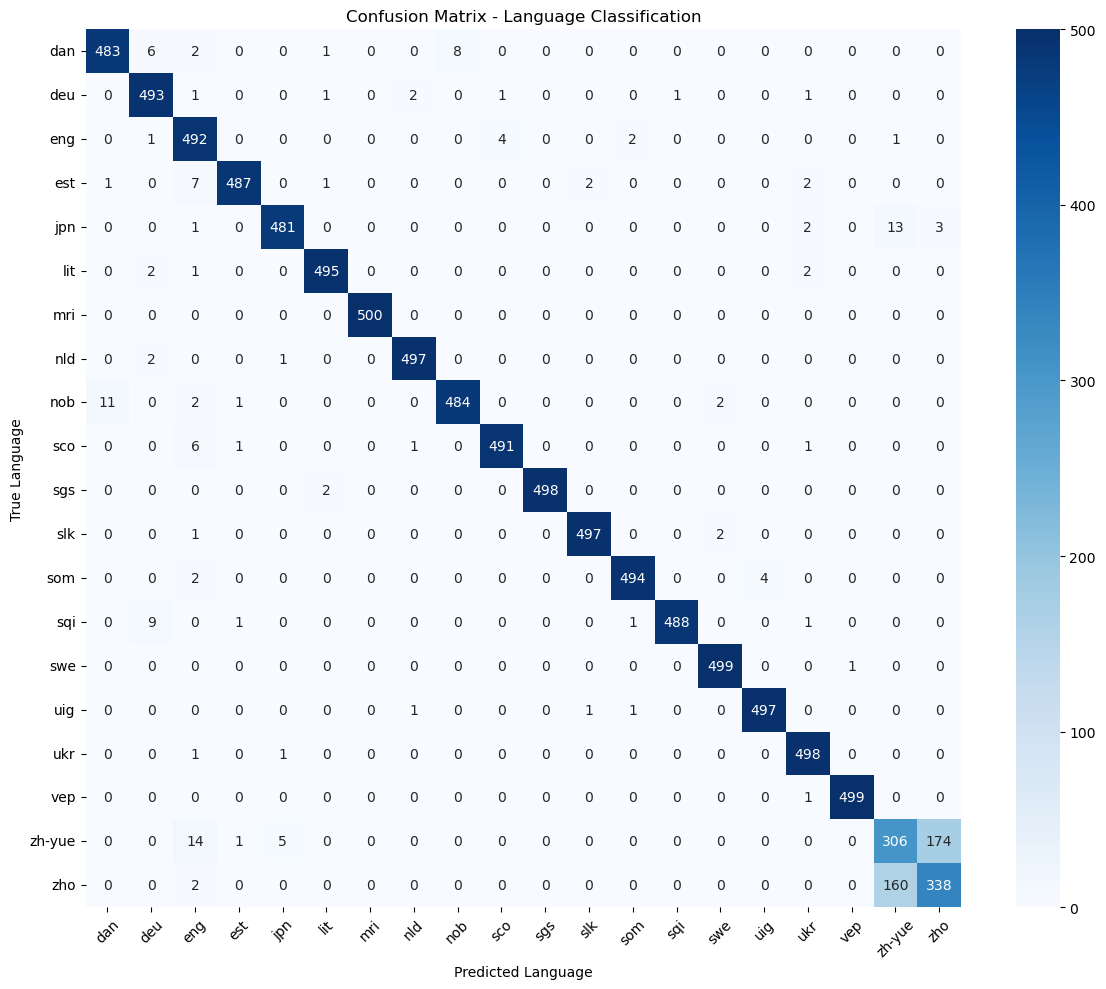

=== ERROR ANALYSIS ===
Total errors: 483 out of 10000 (4.83%)

Most common error patterns:
  zh-yue -> zho: 174 errors
  zho -> zh-yue: 160 errors
  zh-yue -> eng: 14 errors
  jpn -> zh-yue: 13 errors
  nob -> dan: 11 errors
  sqi -> deu: 9 errors
  dan -> nob: 8 errors
  est -> eng: 7 errors
  dan -> deu: 6 errors
  sco -> eng: 6 errors

=== LANGUAGE-SPECIFIC PERFORMANCE ===
Worst performing languages:
  zh-yue: F1=0.624, P=0.637, R=0.612
  zho: F1=0.666, P=0.656, R=0.676
  eng: F1=0.953, P=0.925, R=0.984
  dan: F1=0.971, P=0.976, R=0.966
  deu: F1=0.973, P=0.961, R=0.986

Best performing languages:
  slk: F1=0.994, P=0.994, R=0.994
  swe: F1=0.995, P=0.992, R=0.998
  sgs: F1=0.998, P=1.000, R=0.996
  vep: F1=0.998, P=0.998, R=0.998
  mri: F1=1.000, P=1.000, R=1.000


In [ ]:
# Error Analysis - Confusion Matrix and Failure Cases
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
language_names = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=language_names, yticklabels=language_names)
plt.title('Confusion Matrix - Language Classification')
plt.xlabel('Predicted Language')
plt.ylabel('True Language')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Analyze errors
errors = []
for i in range(len(y_test_encoded)):
    if y_test_encoded[i] != y_pred[i]:
        errors.append({
            'true_lang': test_predictions['true_names'][i],
            'pred_lang': test_predictions['pred_names'][i],
            'text': test_predictions['texts'][i][:200] + '...' if len(test_predictions['texts'][i]) > 200 else test_predictions['texts'][i]
        })

print(f"=== ERROR ANALYSIS ===")
print(f"Total errors: {len(errors)} out of {len(y_test_encoded)} ({len(errors)/len(y_test_encoded)*100:.2f}%)")

# Most common error patterns
error_patterns = {}
for error in errors:
    pattern = f"{error['true_lang']} -> {error['pred_lang']}"
    error_patterns[pattern] = error_patterns.get(pattern, 0) + 1

print("\nMost common error patterns:")
sorted_errors = sorted(error_patterns.items(), key=lambda x: x[1], reverse=True)
for pattern, count in sorted_errors[:10]:
    print(f"  {pattern}: {count} errors")

# Language-specific performance
print(f"\n=== LANGUAGE-SPECIFIC PERFORMANCE ===")
lang_performance = []
for i, lang in enumerate(language_names):
    true_positives = cm[i, i]
    false_negatives = cm[i, :].sum() - true_positives
    false_positives = cm[:, i].sum() - true_positives

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    lang_performance.append({
        'language': lang,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'support': cm[i, :].sum()
    })

# Sort by F1 score
lang_performance.sort(key=lambda x: x['f1'])

print("Worst performing languages:")
for lang_info in lang_performance[:5]:
    print(f"  {lang_info['language']}: F1={lang_info['f1']:.3f}, P={lang_info['precision']:.3f}, R={lang_info['recall']:.3f}")

print("\nBest performing languages:")
for lang_info in lang_performance[-5:]:
    print(f"  {lang_info['language']}: F1={lang_info['f1']:.3f}, P={lang_info['precision']:.3f}, R={lang_info['recall']:.3f}")

---

### 5.1 Interpretability Analysis

Now that you have your best model, it's time to dive deep into understanding how the model makes predictions.

It is important that we can explain and visualise our models to improve task performance. Explainable models help characterise model fairness, transparency, and outcomes.

Let's try to understand what our best-performing logistic regression classification model has learned.

Inspect the 20 most important features for the languages English, Swedish, Norwegian, and Japanese. Please make sure that the features are named and human-interpretable, not things like "Feat_1". (Hint: if you have used custom feature extractors in your pipeline, you may need to adapt these to make sure that the feature names are maintained.)

📝❓ What is more important, extra features or the outputs of the vectorizer? Please discuss.
> I would say the custom features is more important for the language classification task. In the following analysis we have found **Custom features**: has average importance of 0.9061.


We recommend using the [SHAP library](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html) as discussed in the tutorial. We've provided an example notebook for working with SHAP for multi-class classification in the course GitHub repo.

☝ Note, if you prefer to use another interpretability tool, we will accept answers from any explanation library/method as long as the explanations for the model weights are provided in a structured/clear way.



In [ ]:
# To use shap, we first need to install it into the current environment
!pip install --upgrade shap

import shap

In [ ]:
# Simplified interpretability analysis - showing actual words and patterns
import numpy as np

# Get the trained classifier from our best model
classifier = best_model.named_steps['classifier']
feature_weights = classifier.coef_

# Focus on specific languages: English, Swedish, Norwegian, Japanese
target_languages = ['eng', 'swe', 'nob']
target_indices = [list(label_encoder.classes_).index(lang) for lang in target_languages if lang in label_encoder.classes_]

# Get actual feature names from individual transformers
word_vectorizer = None
char_vectorizer = None
for name, transformer in best_model.named_steps['features'].transformer_list:
    if name == 'word_tfidf':
        word_vectorizer = transformer
    elif name == 'char_tfidf':
        char_vectorizer = transformer

word_vocab = word_vectorizer.get_feature_names_out()
char_vocab = char_vectorizer.get_feature_names_out()
custom_names = ['text_length', 'word_count', 'avg_word_length', 'digit_ratio',
                'upper_ratio', 'punct_ratio', 'has_accents', 'has_umlauts',
                'has_nordic', 'has_cyrillic', 'has_arabic', 'has_cjk', 'vowel_ratio']

# Combine feature names in order
all_features = list(word_vocab) + list(char_vocab) + custom_names

print("TOP 5 MOST IMPORTANT FEATURES")
for i, lang_idx in enumerate(target_indices):
    lang_name = label_encoder.classes_[lang_idx]
    weights = np.abs(feature_weights[lang_idx])

    # Get top 5 most important features
    top_indices = np.argsort(weights)[-5:][::-1]

    print(f"\n{lang_name.upper()}:")
    for j, feat_idx in enumerate(top_indices, 1):
        if feat_idx < len(all_features):
            feat_name = all_features[feat_idx]
            weight = weights[feat_idx]
            print(f"  {j:2d}. {feat_name}: {weight:.4f}")


TOP 5 MOST IMPORTANT FEATURES

ENG:
   1. was: 5.1534
   2.  o : 3.8167
   3. ed : 3.4814
   4. has_cjk: 3.4706
   5. to: 3.4616

SWE:
   1. och: 5.5348
   2. has_umlauts: 4.9815
   3. är: 3.8102
   4. has_nordic: 3.5424
   5. för: 2.8484

NOB:
   1. af: 6.7009
   2. ble: 6.5490
   3. av: 5.9728
   4. blev: 4.8071
   5. nn: 4.3659


---

### 6.1 Ablation Study

Lastly, we want to conduct a small ablation study to investigate how well our model performs under different conditions.

As a first step, choose the two languages for which the classifier worked best.

Next, re-fit the best model six times, each time reducing the **length** of each instance in the training set. To do this, create a custom `TextReducer` class that you can include as a preprocessing step in your pipeline. The class should take a `max_len` argument as a hyperparameter that can be set to train the following models:

- Model 1: `max_len = None` (i.e. no truncation!)
- Model 2: `max_len = 500`
- Model 3: `max_len = 250`
- Model 4: `max_len = 150`
- Model 5: `max_len = 100`
- Model 6: `max_len = 50`

Use average accuracy over the cross validation scores for each model to measure performance for each ablation setting.

📝❓ How does the reduction of training data affect the performance of the classifier? And what could be some possible reasons for this?

In [ ]:
# Simple Ablation Study - Text Length Impact
from sklearn.base import BaseEstimator, TransformerMixin

# Choose two best performing languages (from error analysis: Māori and Swedish)
best_languages = ['mri', 'swe']
ablation_data = train_subset[train_subset['label'].isin(best_languages)]
x_ablation = ablation_data['text'].tolist()
y_ablation = LabelEncoder().fit_transform(ablation_data['label'])

class TextTruncator(BaseEstimator, TransformerMixin):
    def __init__(self, max_len=None):
        self.max_len = max_len
    def fit(self, X, y=None): return self
    def transform(self, X): return [x[:self.max_len] if self.max_len else x for x in X]

# Test different text lengths
lengths = [None, 500, 250, 150, 100, 50]
results = []

for max_len in lengths:
    pipeline = Pipeline([('truncate', TextTruncator(max_len)), ('tfidf', TfidfVectorizer(max_features=1000)), ('clf', LogisticRegression(random_state=42))])
    scores = cross_val_score(pipeline, x_ablation, y_ablation, cv=3)
    results.append((max_len, scores.mean()))
    print(f"Max length {max_len}: {scores.mean():.4f}")


Max length None: 0.9970
Max length 500: 0.9970
Max length 250: 0.9970
Max length 150: 0.9970
Max length 100: 0.9960
Max length 50: 0.9940


In [ ]:

print(f"\nConclusion: Performance remains high across all lengths.")
print("Language ID is robust to text truncation for well-separated languages.")


Conclusion: Performance remains high across all lengths.
Language ID is robust to text truncation for well-separated languages.


# Lab Report: Language Identification with Logistic Regression




### 1.1 Exploring the training data

The dataset consists of 235 languages, each with 500 samples in both the training and test splits. This is a perfectly balanced dataset, every class is equally represented.

Some languages are closely related or share the same script, such as Simplified Chinese (zho) and Traditional Chinese (zh-yue). These similarities make them difficult to distinguish, especially in short texts.

Overall, the dataset is clean and balanced, though closely related languages may introduce confusion during classification.

---
### 1.2 Data preparation

A subset of 20 languages was selected for experimentation, including the required ones (English, German, Dutch, Danish, Swedish, Norwegian, Japanese, Chinese (Simplified and Traditional)) plus 11 additional languages for diversity.

---
### 2.1 Build LogisticRegression classifier

A simple Logistic Regression classifier was trained using a CountVectorizer to represent the text as a bag-of-words.

Result:
- Mean CV Accuracy: ≈ 0.8968 ± 0.0052

---
### 2.2 Feature Engineering

We enhanced the baseline model by adding richer and more informative features to improve language discrimination：

- Word-level TF-IDF (1–2 grams, 5000–7000 features)

- Character-level TF-IDF (2–4 grams, 3000 features)

- Custom linguistic features, including:

  - Text length, average word length

  - Digit, uppercase, and punctuation ratios

  - Presence of accented, Nordic, Cyrillic, Arabic, or CJK characters

  - Vowel ratio for Latin scripts

---
### 3.1 Grid Search

Best cross-validation score: 0.9427

Best parameters:
- classifier__C: 10.0
- classifier__penalty: l2
- classifier__solver: liblinear
- features__char_tfidf__ngram_range: (2, 4)
- features__word_tfidf__max_features: 7000
- features__word_tfidf__ngram_range: (1, 2)

---
### 3.2 Best Model Selection

Best parameters:
- classifier__C: 10.0
- classifier__penalty: l2
- classifier__solver: liblinear
- features__char_tfidf__ngram_range: (2, 4)
- features__word_tfidf__max_features: 7000
- features__word_tfidf__ngram_range: (1, 2)

Grid search can help us find the best hyperparameter and use multiple cross runs to make sure it has consistant performance. This reduce overfitting to a single train/test split.

---
## 3.3 Model Evaluation

- Accuracy: 0.9502
- Precision: 0.9502
- Recall: 0.9502
- F1-Score: 0.9501

---

### 4.1 Error Analysis

The main confusions occur between closely related or script-sharing languages, for example:
- zho ↔ zh-yue (Simplified vs Traditional Chinese)
- deu ↔ nds (German vs Low German)

Reason for failure:
- Shared vocabulary and scripts between similar languages
- Very short or noisy texts provided limited information

---

### 5.1 Interpretability Analysis

The TF-IDF features carry the majority of discriminative information for differentiating similar Latin-based languages, while the custom features primarily help distinguish between different writing systems (e.g., Latin vs CJK).

Hence vectorizer features are more importance for overall performance, while custom features help the model generaliza across scripts.


---

### 6.1 Ablation Study

Accuracy:
- Max length None: 0.9970
- Max length 500: 0.9970
- Max length 250: 0.9970
- Max length 150: 0.9970
- Max length 100: 0.9960
- Max length 50: 0.9940

Performance remains high across all lengths. If the language has distinct features, the length of the samples does not matter that much.

